In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

Reading the Data File

In [2]:
data = pd.read_csv('/content/Salary_Pred_Dataset.csv')
data.sample(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
25,28.0,Female,Bachelor's,Social Media Specialist,3.0,45000.0
345,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
50,51.0,Female,Bachelor's,Customer Service Manager,22.0,130000.0
326,43.0,Female,PhD,Senior Data Scientist,15.0,150000.0
157,33.0,Male,Master's,Senior Operations Manager,7.0,115000.0
306,49.0,Female,Master's,Director of Marketing,21.0,180000.0
135,39.0,Female,Bachelor's,Administrative Assistant,10.0,55000.0
164,41.0,Female,Master's,Senior Human Resources Manager,13.0,120000.0
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
289,32.0,Male,Bachelor's,Junior Product Manager,4.0,65000.0


Number of Rows and Columns

In [3]:
data.shape

(375, 6)

Changing the column names

In [4]:
data.columns = ['Age','Gender','Degree','Job_Title','Experience','Salary']
data.sample(5)

,Age,Gender,Degree,Job_Title,Experience,Salary
70,33.0,Male,Bachelor's,Web Developer,6.0,65000.0
20,34.0,Female,Master's,Business Analyst,5.0,80000.0
329,48.0,Male,Master's,Director of Marketing,21.0,180000.0
168,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,50000.0
84,29.0,Female,Bachelor's,Junior Designer,2.0,40000.0


Column Datatypes

In [5]:
data.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_Title,object
Experience,float64
Salary,float64


Information of Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         373 non-null    float64
 1   Gender      373 non-null    object 
 2   Degree      373 non-null    object 
 3   Job_Title   373 non-null    object 
 4   Experience  373 non-null    float64
 5   Salary      373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Duplicate Data Columns

In [7]:
data[data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


Droping the Duplicates

In [8]:
df = data.drop_duplicates(keep = 'first')
df.shape

(325, 6)

Null Values in the Dataset

In [9]:
df.isnull().sum()

,0
Age,1
Gender,1
Degree,1
Job_Title,1
Experience,1
Salary,1


Drooping the null values

In [10]:
df.dropna(how = 'any', inplace=True)

<ipython-input-10-e6e3db70e39a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how = 'any', inplace=True)


In [11]:
df

,Age,Gender,Degree,Job_Title,Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


Numerical Column Stats

In [12]:
df.describe()

,Age,Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


Histogram of each column

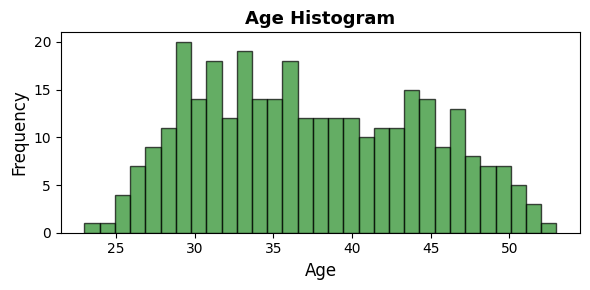

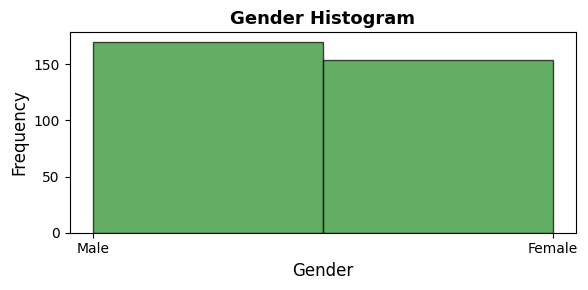

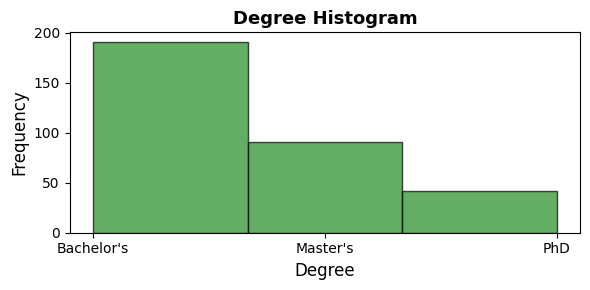

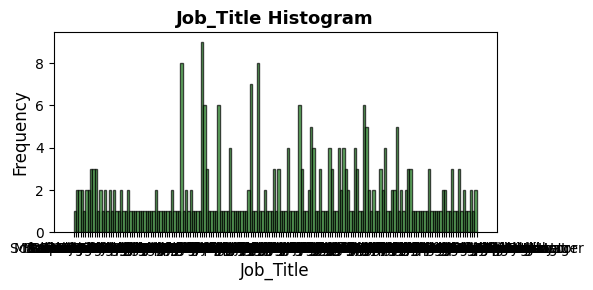

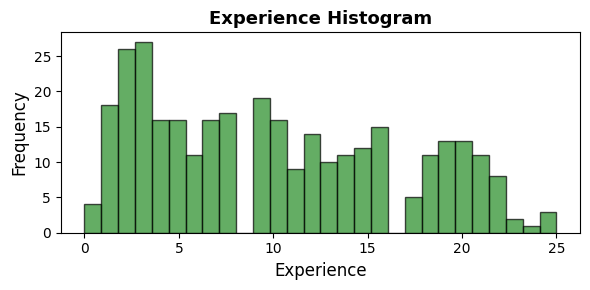

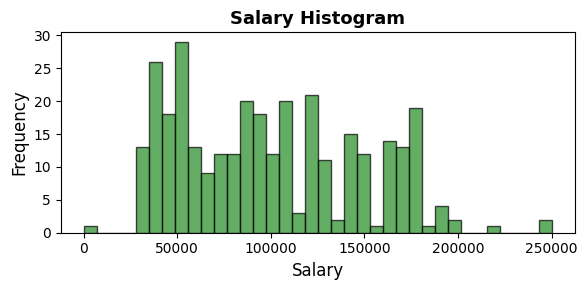

In [13]:
#Plotting Histogram for each column
for column in df.columns:
    plt.figure(figsize=(6, 3))
    plt.hist(df[column], bins=len(df[column].unique()), color='forestgreen', edgecolor='black', alpha=0.7)
    plt.title(f"{column} Histogram", fontsize=13, fontweight='bold', color='black')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()



Salary BoxPlot

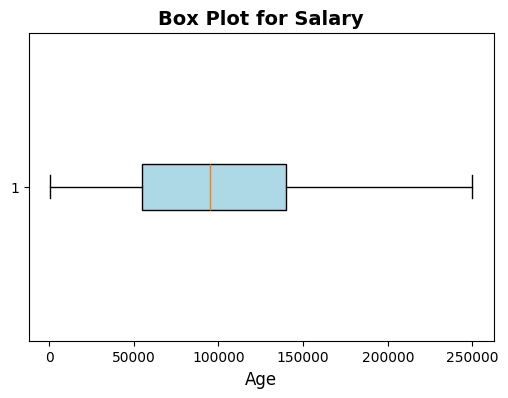

In [14]:
#Boxplot for Salary
plt.figure(figsize=(6, 4))
plt.boxplot(df['Salary'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for Salary", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.show()


Age BoxPlot

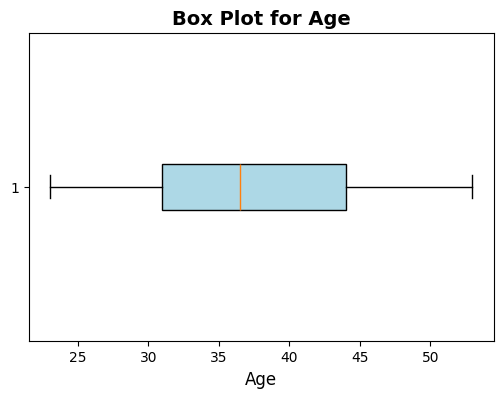

In [15]:
#Boxplot for Age
plt.figure(figsize=(6, 4))
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for Age", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.show()


Salary v/s Experience

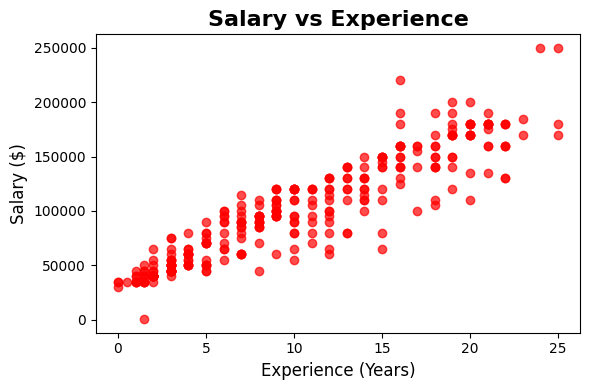

In [16]:
#Salary vs Experience
plt.figure(figsize=(6, 4))
plt.scatter(df['Experience'], df['Salary'], alpha=0.7, color='red')
plt.title('Salary vs Experience', fontsize=16, fontweight='bold')
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Salary v/s Age

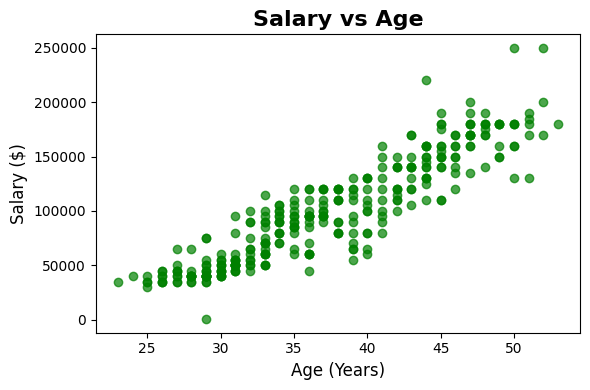

In [17]:
#Salary vs Experience
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Salary'], alpha=0.7, color='green')
plt.title('Salary vs Age', fontsize=16, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Salary w.r.t Degree

<ipython-input-18-ba3e7964c2b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Degree', y='Salary', data=df, palette='dark')


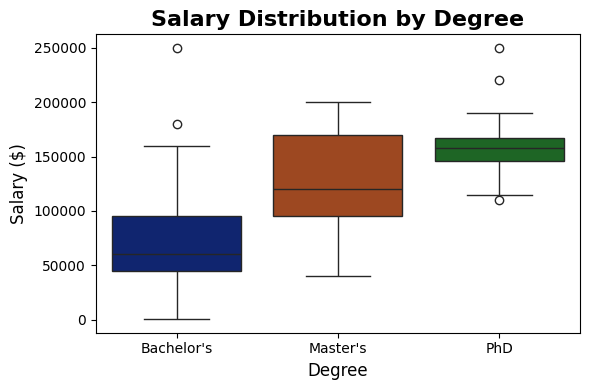

In [18]:
#Salary by Degree
plt.figure(figsize=(6, 4))
sns.boxplot(x='Degree', y='Salary', data=df, palette='dark')
plt.title('Salary Distribution by Degree', fontsize=16, fontweight='bold')
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Salary vs Experience by Gender

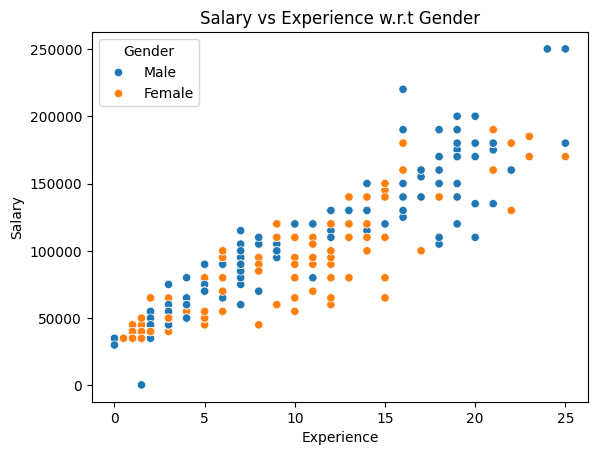

In [19]:
#Salary vs Experience by Gender
sns.scatterplot(x='Experience', y='Salary', hue='Gender', data=data)
plt.title("Salary vs Experience w.r.t Gender")
plt.show()

Feature Scalling

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler()
df['Age'] = min_max_scalar.fit_transform(df[['Age']])
df['Experience'] = min_max_scalar.fit_transform(df[['Experience']])

<ipython-input-20-cacbc462caf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = min_max_scalar.fit_transform(df[['Age']])
<ipython-input-20-cacbc462caf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experience'] = min_max_scalar.fit_transform(df[['Experience']])


Label Encoding Categorical Columns

In [21]:
#Label Encoding categorical columns
label_encoding = {}
categorical_columns = ['Gender', 'Degree', 'Job_Title']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoding[col] = le

<ipython-input-21-39accb2d3b4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-21-39accb2d3b4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-21-39accb2d3b4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [22]:
df.sample(15)

,Age,Gender,Degree,Job_Title,Experience,Salary
187,0.366667,1,0,145,0.36,100000.0
144,0.066667,0,1,65,0.06,40000.0
324,0.200000,0,0,62,0.08,40000.0
288,0.700000,1,0,153,0.52,130000.0
99,0.733333,1,0,87,0.80,110000.0
63,0.800000,1,2,115,0.84,180000.0
232,0.133333,0,1,72,0.06,50000.0
161,0.833333,1,1,31,0.84,175000.0
298,0.233333,0,0,67,0.08,40000.0
218,0.200000,1,0,51,0.06,35000.0


Correlation Matrix of Numerical Columns

In [23]:
correl = df.corr()
correl

,Age,Gender,Degree,Job_Title,Experience,Salary
Age,1.000000,-0.025034,0.540383,0.118619,0.979192,0.916543
Gender,-0.025034,1.000000,-0.024470,0.039072,-0.001367,0.075420
Degree,0.540383,-0.024470,1.000000,0.113519,0.573912,0.661900
Job_Title,0.118619,0.039072,0.113519,1.000000,0.105513,0.135939
Experience,0.979192,-0.001367,0.573912,0.105513,1.000000,0.924455
Salary,0.916543,0.075420,0.661900,0.135939,0.924455,1.000000


Correlation Heat Map

<Axes: >

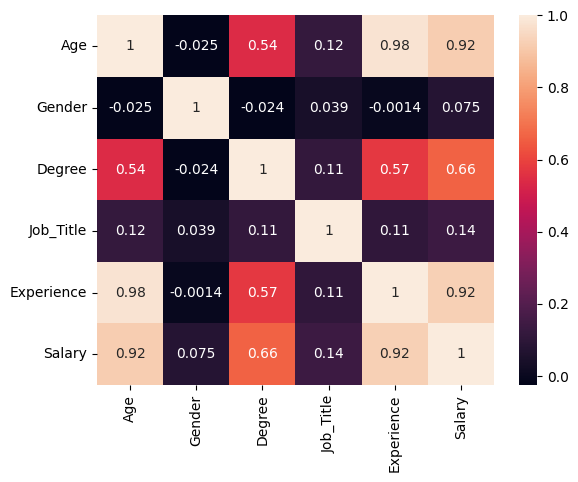

In [24]:
sns.heatmap(correl, annot = True)

Splitting and Training the Data

In [25]:
# Split data into features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, y_train.shape

((259, 5), (259,))

In [27]:
X_test.shape, y_test.shape

((65, 5), (65,))

Model Training

In [28]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predict = linear_reg.predict(X_test)

#Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
random_forest_predict = random_forest.predict(X_test)

#XGBoost
x_gradient = XGBRegressor(random_state=42)
x_gradient.fit(X_train, y_train)
x_gradient_predict = x_gradient.predict(X_test)

Margin of error b/w actual value & predicted value

In [29]:
data1 = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': linear_reg_predict})
data1['Error_Linear_Reg'] = data1['y_Actual'] - data1['y_Predicted']
data1.head(10)

,y_Actual,y_Predicted,Error_Linear_Reg
132,100000.0,117415.913446,-17415.913446
108,100000.0,125562.807428,-25562.807428
137,50000.0,48965.153862,1034.846138
9,110000.0,128739.348880,-18739.348880
181,105000.0,106828.499305,-1828.499305
126,95000.0,99654.767488,-4654.767488
221,45000.0,49101.278837,-4101.278837
198,55000.0,57130.711081,-2130.711081
279,180000.0,166333.690093,13666.309907
144,40000.0,43112.610601,-3112.610601


In [30]:
data2 = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': random_forest_predict})
data2['Error_Random_Forest'] = data2['y_Actual'] - data2['y_Predicted']
data2.head(10)

,y_Actual,y_Predicted,Error_Random_Forest
132,100000.0,107950.000000,-7950.000000
108,100000.0,118650.000000,-18650.000000
137,50000.0,48100.000000,1900.000000
9,110000.0,115150.000000,-5150.000000
181,105000.0,103550.000000,1450.000000
126,95000.0,100700.000000,-5700.000000
221,45000.0,50200.000000,-5200.000000
198,55000.0,54416.666667,583.333333
279,180000.0,169800.000000,10200.000000
144,40000.0,46600.000000,-6600.000000


In [31]:
data3 = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': x_gradient_predict})
data3['Error_X_Gradient'] = data3['y_Actual'] - data3['y_Predicted']
data3.head(10)

,y_Actual,y_Predicted,Error_X_Gradient
132,100000.0,107222.828125,-7222.828125
108,100000.0,131681.031250,-31681.031250
137,50000.0,52941.242188,-2941.242188
9,110000.0,122342.859375,-12342.859375
181,105000.0,109681.929688,-4681.929688
126,95000.0,96245.601562,-1245.601562
221,45000.0,42387.578125,2612.421875
198,55000.0,53962.855469,1037.144531
279,180000.0,169500.484375,10499.515625
144,40000.0,49654.789062,-9654.789062


Mean Absolute Error

In [32]:
#Absolute MAE of all models
MAE_Logistic_Regression = data1['Error_Linear_Reg'].mean()
MAE_Random_Forest = data2['Error_Random_Forest'].mean()
MAE_X_Gradient = data3['Error_X_Gradient'].mean()

print(f"Mean MAE for Linear Regression: {MAE_Logistic_Regression:.2f}")
print(f"Mean MAE for Random Forest: {MAE_Random_Forest:.2f}")
print(f"Mean MAE for XGBoost: {MAE_X_Gradient:.2f}")

Mean MAE for Linear Regression: 176.88
Mean MAE for Random Forest: 843.18
Mean MAE for XGBoost: 709.23


Evaluating the Model

In [33]:
#Evaluation Metrics
def evaluate_model(name, y_test, predictions):
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    R2 = r2_score(y_test, predictions)
    Accuracy = R2 * 100
    print(f"{name} - RMSE: {RMSE}, R²: {R2}, Accuracy: {Accuracy}%")
    return RMSE, R2, Accuracy

results = {}
results['Linear Regression'] = evaluate_model("Linear Regression", y_test, linear_reg_predict)
results['Random Forest'] = evaluate_model("Random Forest", y_test, random_forest_predict)
results['XGBoost'] = evaluate_model("XGBoost", y_test, x_gradient_predict)

Linear Regression - RMSE: 14344.13244909783, R²: 0.8911231066517088, Accuracy: 89.11231066517088%
Random Forest - RMSE: 12735.993514856627, R²: 0.9141672938092348, Accuracy: 91.41672938092348%
XGBoost - RMSE: 13097.188368630012, R²: 0.909229799562235, Accuracy: 90.9229799562235%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Predicting the Salary

In [34]:
def predict_salary_from_all_models(input_data):
    ip_df = pd.DataFrame([input_data])

    #Label Encoding
    for col in categorical_columns:
        ip_df[col] = label_encoding[col].transform(ip_df[col])

    #Salary Prediction from all the models
    return {
        "Linear Regression": linear_reg.predict(ip_df)[0],
        "Random Forest": random_forest.predict(ip_df)[0],
        "XGBoost": x_gradient.predict(ip_df)[0]
    }

#Input Values
input = {
    'Age': 27,
    'Gender': 'Female',
    'Degree': "Master's",
    'Job_Title': 'Data Analyst',
    'Experience': 5
}

#Predicting the Salary
salary_pred = predict_salary_from_all_models(input)
for model, salary in salary_pred.items():
    print(f"{model}: {salary*100000:.2f}")


Linear Regression: 267217961282.22
Random Forest: 18245000000.00
XGBoost: 17779878125.00


Best model

In [35]:
#Compare Models
best_model = min(results, key=lambda x: results[x][0])  # Based on RMSE
print(f"The best model is {best_model} with RMSE: {results[best_model][0]}")

The best model is Random Forest with RMSE: 12735.993514856627
